Epoch 1/50
399/399 - 4s - 11ms/step - accuracy: 0.7825 - loss: 1.0700 - val_accuracy: 0.8402 - val_loss: 0.8177
Epoch 2/50
399/399 - 2s - 4ms/step - accuracy: 0.8291 - loss: 0.7814 - val_accuracy: 0.8473 - val_loss: 0.6758
Epoch 3/50
399/399 - 2s - 5ms/step - accuracy: 0.8380 - loss: 0.6634 - val_accuracy: 0.8429 - val_loss: 0.6129
Epoch 4/50
399/399 - 2s - 6ms/step - accuracy: 0.8386 - loss: 0.6094 - val_accuracy: 0.8287 - val_loss: 0.5995
Epoch 5/50
399/399 - 2s - 6ms/step - accuracy: 0.8430 - loss: 0.5708 - val_accuracy: 0.8094 - val_loss: 0.6034
Epoch 6/50
399/399 - 2s - 6ms/step - accuracy: 0.8423 - loss: 0.5481 - val_accuracy: 0.8571 - val_loss: 0.4996
Epoch 7/50
399/399 - 2s - 6ms/step - accuracy: 0.8461 - loss: 0.5254 - val_accuracy: 0.8353 - val_loss: 0.5302
Epoch 8/50
399/399 - 2s - 6ms/step - accuracy: 0.8455 - loss: 0.5208 - val_accuracy: 0.8451 - val_loss: 0.5026
Epoch 9/50
399/399 - 2s - 6ms/step - accuracy: 0.8469 - loss: 0.5093 - val_accuracy: 0.8504 - val_loss: 0.4991


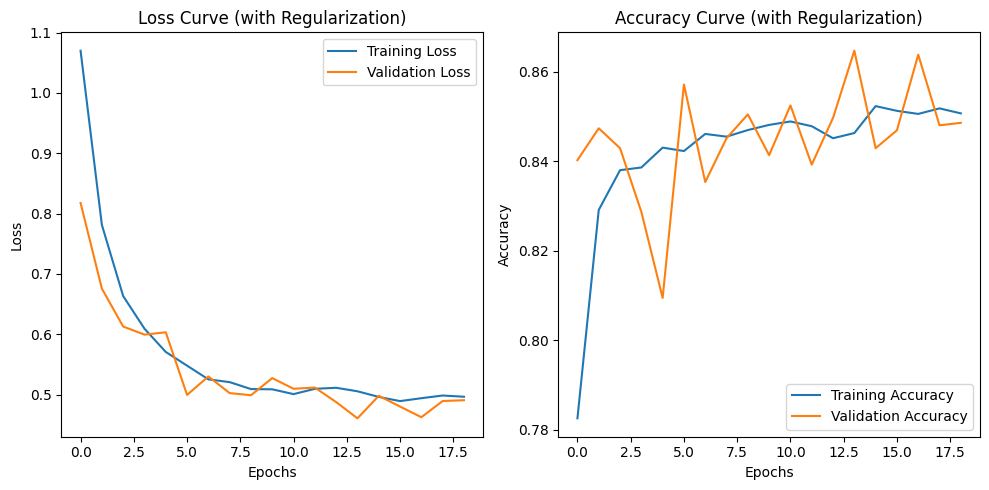

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


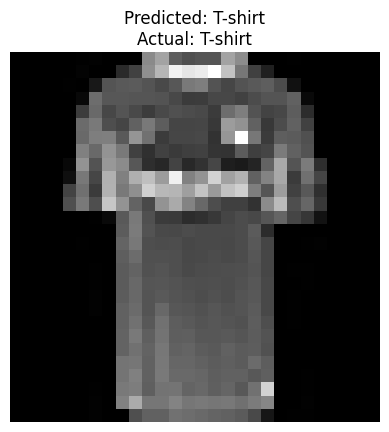

In [ ]:
# Regularization Techniques in Deep Learning
# Using Fashion-MNIST dataset
# ==========================================

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Load and Prepare the Dataset
# ------------------------------
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to [0,1] range for faster convergence
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Flatten 28x28 images into 784-dimensional vectors
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# Split validation data from training set (15% for validation)
X_val = X_train[:9000]
y_val = y_train[:9000]
X_train = X_train[9000:]
y_train = y_train[9000:]

# Class labels for display (not needed in model)
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

#  Build the Regularized Model
# ------------------------------
model = keras.Sequential([
    # Hidden Layer 1
    layers.Dense(256, activation="relu",
                 kernel_regularizer=regularizers.l2(0.001)),   # L2 Regularization
    layers.BatchNormalization(),                             # Normalizes activations
    layers.Dropout(0.4),                                     # 40% Dropout

    # Hidden Layer 2
    layers.Dense(128, activation="relu",
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Output Layer - 10 classes with Softmax
    layers.Dense(10, activation="softmax")
])

#  Compile the Model
# ------------------------------
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Define Early Stopping Callback
# ------------------------------
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,               # Wait for 5 epochs for improvement
    restore_best_weights=True
)

#  Train the Model
# ------------------------------
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],   # Stops training early to prevent overfitting
    verbose=2
)

# Evaluate the Model
# ------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n Test Accuracy: {test_acc:.4f}")
print(f" Test Loss: {test_loss:.4f}")

#  Plot Learning Curves
# ------------------------------
plt.figure(figsize=(10, 5))

# Plot training vs validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss Curve (with Regularization)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plot training vs validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy Curve (with Regularization)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

#  Sample Prediction Check
# ------------------------------
import numpy as np

i = np.random.randint(0, len(X_test))
img = X_test[i].reshape(28, 28)
pred = np.argmax(model.predict(X_test[i].reshape(1, -1)))

plt.imshow(img, cmap="gray")
plt.title(f"Predicted: {class_names[pred]}\nActual: {class_names[y_test[i]]}")
plt.axis("off")
plt.show()
